### Importing libraries

In [4]:
import os
import pandas as pd
import numpy as np
import pickle
# from keras.models import load_model

# import required libaries to process images
import PIL
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 
 
#using Keras
import tensorflow as tf
# from tensorflow.keras import datasets, layers, models, preprocessing
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
import keras
# from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [16]:
'/'.join(os.getcwd().split('/')[:-1]) + '/wildfire_prediction_pipeline'

'/Users/scottdeittrick/Desktop/Wildfire_Detection_Capstone_697/wildfire_prediction_pipeline'

In [19]:
import wildfire_image_load
from wildfire_detection_train import test_train_split
import wildfire_image_transform

### Loading Image Pickle File Images

In [4]:
dir = os.getcwd()

with open('{}/artifacts/{}'.format(dir, 'processed_images.pkl'), 'rb') as pickle_file:
    data = pickle.load(pickle_file)

In [5]:
train_images, train_labels, dev_images, dev_labels, test_images, test_labels = test_train_split(data)

/Users/scottdeittrick/opt/anaconda3/envs/wild_fire_detection_capstone/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


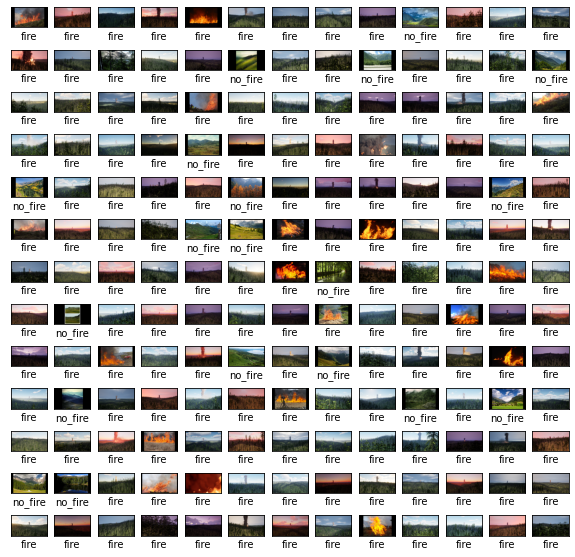

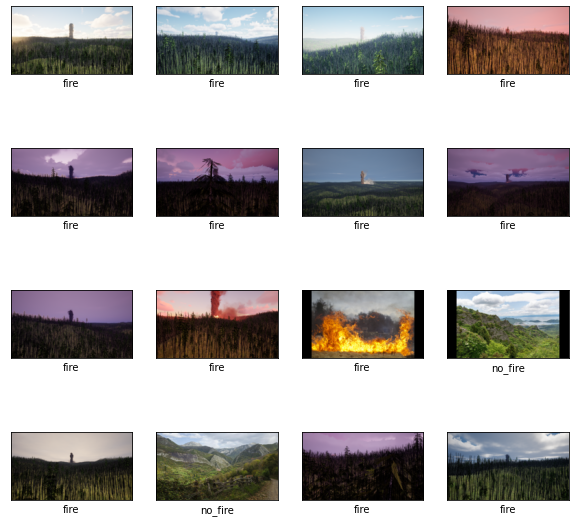

In [6]:
#testing label application
def plot_images(images, labels):
    import math

    p_size = math.floor(math.sqrt(len(images)))

    class_names = ['no_fire','fire']
    plt.figure(figsize=(10,10))
    for i in range(p_size**2):
        plt.subplot(p_size,p_size,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[int(labels[i][0])])
    
plot_images(train_images, train_labels)
plot_images(test_images, test_labels)

In [7]:
dev_images[0].shape

(100, 178, 3)

In [10]:
model = tf.keras.models.load_model('model.h5')
width = model.input_shape[2]
height = model.input_shape[1]

print(width, height)

2021-11-11 16:13:46.002908: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-11 16:13:46.003299: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


178 100


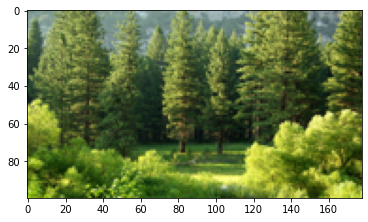

In [12]:
img = Image.open('test_image_trees.jpeg')
from wildfire_image_load import resize_image
from wildfire_image_transform import pad_images
img = img.resize((width, height))
img = np.array(img)/255.00
img_array = tf.expand_dims(img, 0)
plt.imshow(img)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 176, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 88, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 86, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 41, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 55104)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [14]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
np.argmax(score)
#np.max(score)

1